# Interpolation with polynomials

This notebook demonstrates the Lagrange polynomial and Newtons divided-difference methods for fitting an $n^\text{th}$-order polynomial to a data set with $n+1$ elements

## Lagrange polynomials

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

Below we enter the data we want to interpolate. The data comes in $(x,y)$ pairs, and does not need to be in any order.

In [2]:
data = np.array([[0,0], [1,10], [3,3], [-1,4], [4,10], [5,10]])
print(data.shape)

(6, 2)


The formula for the Lagrange polynomial is: $$f_n(x) = \sum_{i=1}^{n+1}f(x_i)L_i(x)$$ where $$L_i(x) = \prod_{j=1,\ne i}^{n+1} \frac{x-x_j}{x_i-x_j}$$ Below is a function that implements this.

In [3]:
# For the arguements: 
#     x is the data point (or array of points) to evaluate the intepolaring polynomial at
#     data is the data to be interpolated
def LagrangePoly(x, data):
    n = data.shape[0] - 1
    i = 1
    fn = 0
    while i <= n + 1:
        j = 1
        Li = 1
        while j <= n+1:
            if(j == i):
                j += 1
                continue
            Li *= (x - data[j-1,0])/(data[i-1,0] - data[j-1,0])
            j += 1
        fn += data[i-1,1]*Li
        i += 1
    return fn

The function above works for a single value of x and also, by the wonders of NumPy, for an array of values. Let's prepare some x-values over which we want to plot the interpolating polynomial. We then provide this numpy array as an argument to the LagrangePoly( ) function.

In [4]:
xmin = np.min(data[:,0])
xmax = np.max(data[:,0])
x = np.linspace(xmin, xmax, 100)
y = LagrangePoly(x, data)

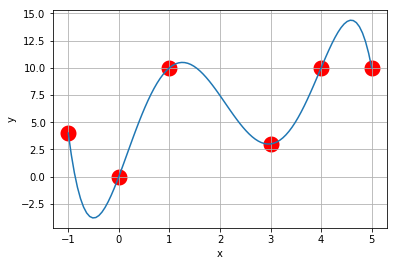

In [5]:
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data[:,0],data[:,1], color='red', linewidths='10');
plt.plot(x,y);

## Newtons divided-difference polynomials

Define the same data set we saw in the lectures

In [6]:
testdata = np.array([[1,1],[2,8],[3,27],[4,64],[6,216],[7,343]])

Define the Finite Difference (FD) function: $$ FD_{j,i}(x) = \frac{f(x_{i+1} - f(x_i)}{x_{i+j} - x_i}$$

In [7]:
def FD(x, fx, j):
    n = fx.size
    FD = np.zeros(n-1)
    i = 0
    while i < n-1:
        FD[i] = (fx[i+1] - fx[i])/(x[i+j] - x[i])
        i += 1
    return FD

Repeatly apply the Finite Difference function to get the table we saw in the lectures

In [8]:
fn = testdata[:,1]
n = 1
while n < testdata.shape[0]:
    print(fn)
    fn = FD(testdata[:,0], fn, n)
    n += 1

[  1   8  27  64 216 343]
[  7.  19.  37.  76. 127.]
[ 6.  9. 13. 17.]
[1. 1. 1.]
[0. 0.]


In [9]:
# This interpolates from the first data point onwards
def NewtonsDividedDifference(x, data, nmax):
    fn = data[0,1]
    n = 0
    xi = data[:,0]
    FDi = FD(xi, data[:,1],1)
    while n < nmax :
        coeff = 1
        i = 0
        while i <= n:
            coeff *= (x - data[i,0])
            i += 1
        fn += coeff*FDi[0]
        FDi = FD(xi, FDi, n+2)
        n += 1
    return fn

Compute and plot the linear, quadratic and cubic approximation

In [10]:
x = np.linspace(0, 7, 100)
y1 = NewtonsDividedDifference(x, testdata, 1)
y2 = NewtonsDividedDifference(x, testdata, 2)
y3 = NewtonsDividedDifference(x, testdata, 3)

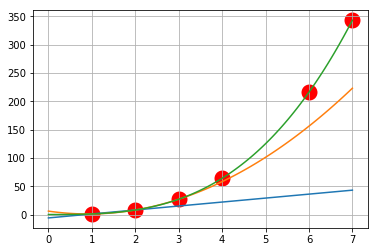

In [11]:
plt.grid(True)
plt.scatter(testdata[:,0], testdata[:,1], color='red', linewidths='10');
plt.plot(x,y1);
plt.plot(x,y2);
plt.plot(x,y3);

Use the Newton divided-difference method to fit the same data as we used with the Lagrange polynomials

In [12]:
x = np.linspace(-1, 5, 100)
y = NewtonsDividedDifference(x, data, 5)

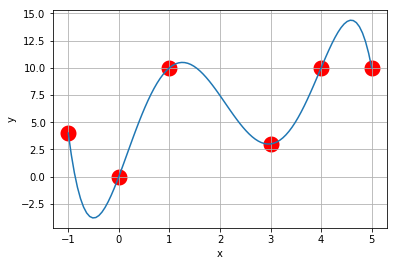

In [13]:
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data[:,0],data[:,1], color='red', linewidths='10');
plt.plot(x,y);

## Runge's phenomenon
Polynomial interpolation does not always converge as you increase the interpolation order. A classic example which exhibts oscillations at the edges is the Runge Function

In [22]:
def RungeFunction(x):
    return 1/(1 + 25*x**2)

As you increase $n$ in the code below the polynomial convergs to the Runge Function near $x=0$ but oscillates wildly near the edges at $x=\{-1,1\}$

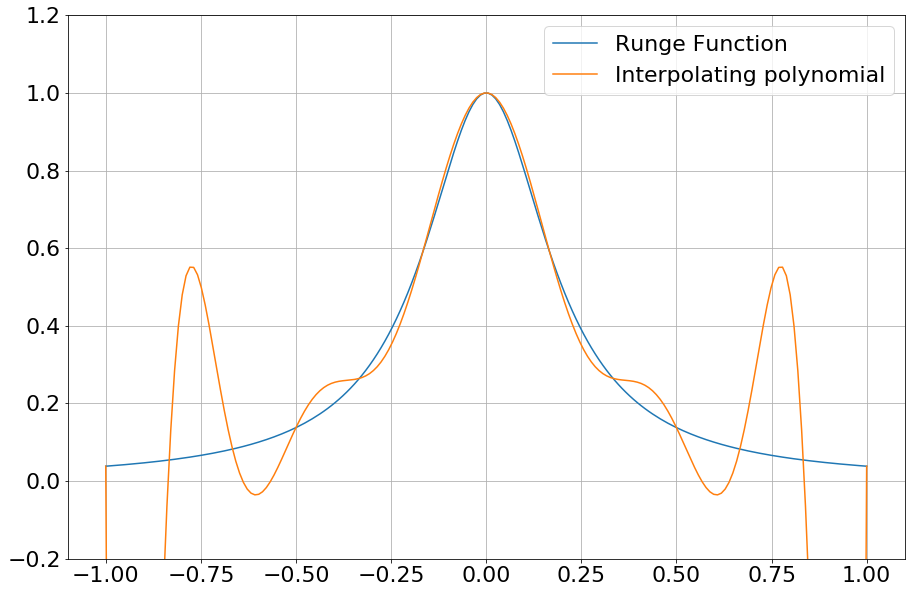

In [26]:
x = np.linspace(-1,1,200)
y = RungeFunction(x)

n = 13
xn = np.linspace(-1,1,n)
yn = RungeFunction(xn)

pn = LagrangePoly(x, np.column_stack((xn, yn)) )

plt.grid(True)
plt.plot(x,y)
plt.ylim([-0.2,1.2])
plt.plot(x,pn);
plt.legend(['Runge Function', 'Interpolating polynomial']);